# Evaluation

## Faster R-CNN

### Set model path

In [3]:
PATH_TO_MODEL = "faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8"

Change this setting to -1 for evaluation script to run on CPU

In [6]:
!export CUDA_VISIBLE_DEVICES=-1

### Run the Evaluation script

The below command will run the evaluation script from the Tensorflow Object Detection API. It will give you results for object detection metrics such as Mean Average Precision(mAP), mAP at Intersection over Union(IOU) 0.5 and mAP at IOU 0.75. These metrics can tell how your model is performing with test data. In the congig we should provide path for label map and imput data in the eval_input_reader field. In below command you should provide path of the config file of the model you trained, the model directory, and checkpoint directory.

In [7]:
!python model_main_tf2.py --pipeline_config_path=training/{PATH_TO_MODEL}/pipeline.config --model_dir=training/{PATH_TO_MODEL} --checkpoint_dir=training/{PATH_TO_MODEL} --alsologtostderr

2022-01-04 16:06:06.154655: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0104 16:06:08.015173 140176705594176 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0104 16:06:08.015274 140176705594176 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0104 16:06:08.015328 140176705594176 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0104 16:06:08.015379 140176705594176 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0104 16:06:08.015445 140176705594176 model_lib_v2.py:1099] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-01-04 16:06:08.028450: I tensorflow/stream_executor/

### Mean Average Precision values

The mean Average Precision of the model is 0.651280, mAP at IoU 0.5 is 0.905198 and mAP at IoU 0.75 is 0.748262. 

### Tensorboard Evaluation plots for Faster R-CNN

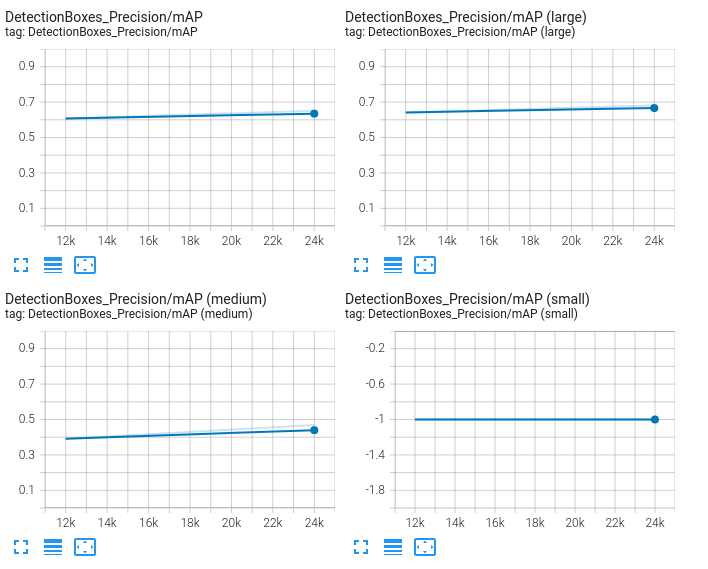

In [16]:
from IPython.display import Image
Image(filename='rcnn_map.png')

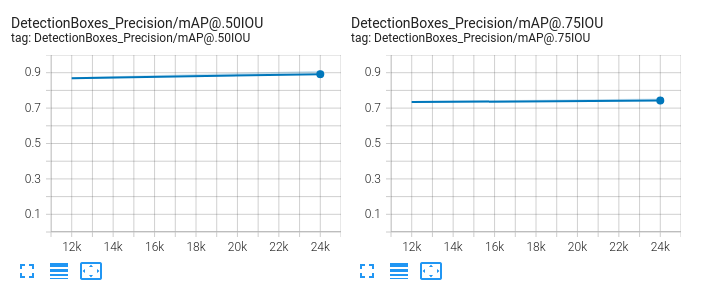

In [17]:
Image(filename='rcnn_iou.png')

The above plots are the screenshots for of the evaluation process from the Tensorboard. You can see that the slope is almost a stright line from 12k to 24k. I trained Faster R-CNN on total 24k steps. This is why I stopped training at 24k. 

## SSD ResNet50

In [7]:
# set path of the SSD ResNet50 model
PATH_TO_MODEL = "ssd_resnet50_v1_fpn_640x640_coco17_tpu-8"

In [8]:
# run evaluation script on CPU
!export CUDA_VISIBLE_DEVICES=-1

In [9]:
!python model_main_tf2.py --pipeline_config_path=training/{PATH_TO_MODEL}/pipeline.config --model_dir=training/{PATH_TO_MODEL} --checkpoint_dir=training/{PATH_TO_MODEL} --alsologtostderr

2022-01-10 15:19:00.991415: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0110 15:19:02.766275 139990226547520 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0110 15:19:02.766379 139990226547520 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0110 15:19:02.766431 139990226547520 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0110 15:19:02.766480 139990226547520 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0110 15:19:02.766549 139990226547520 model_lib_v2.py:1099] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-01-10 15:19:02.770218: I tensorflow/stream_executor/

### Mean Average Precison values

The Mean Average Precision of the SSD ResNet50 model is 0.302656, mAP at IoU 0.5 is 0.617012 and IoU at 0.75 is 0.250373

### Tensorboard Evaluation plots for SSD ResNet50

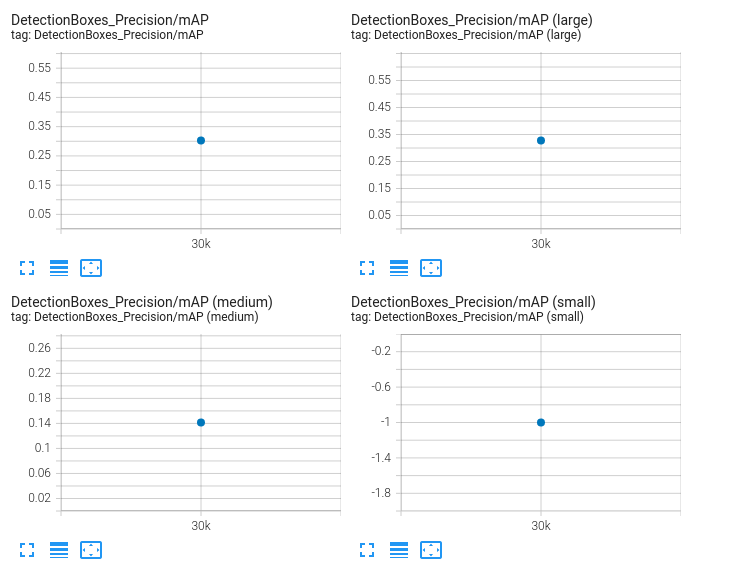

In [18]:
Image(filename='ssd_map.png')

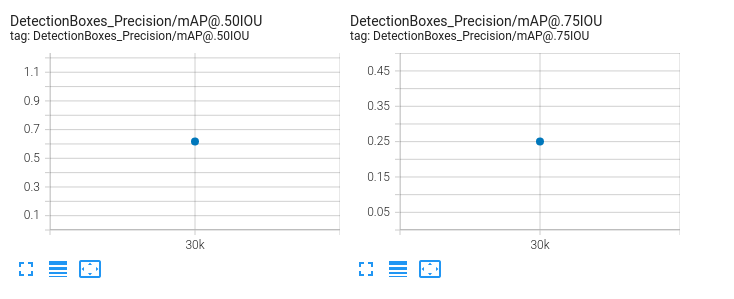

In [19]:
Image(filename='ssd_iou.png')

## Final Thoughts

After evaluating both the models Faster R-CNN is a clear winner in terms of accuracy. The mean Average Precision for Faster R-CNN is 0.651280, better than SSD RestNet50. The model was trained on 800 images per class, if the model was trained on atleast 1000 images it could yield good mAP. Please refer to the Tensorboard notebook for training plots. 